# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [1]:
import tensorflow as tf
import numpy as np
rng = np.random

In [2]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [10]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
Y

array([1.7  , 2.76 , 2.09 , 3.19 , 1.694, 1.573, 3.366, 2.596, 2.53 ,
       1.221, 2.827, 3.465, 1.65 , 2.904, 2.42 , 2.94 , 1.3  ])

In [14]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)
print(W,'\n',b)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.041051716> 
 <tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.4553841>


In [5]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [6]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.500137, W: 0.487541, b: -0.873663
step: 100, loss: 0.425418, W: 0.460544, b: -0.682273
step: 150, loss: 0.366822, W: 0.436638, b: -0.512785
step: 200, loss: 0.320869, W: 0.415467, b: -0.362693
step: 250, loss: 0.284832, W: 0.396719, b: -0.229776
step: 300, loss: 0.256571, W: 0.380116, b: -0.112070
step: 350, loss: 0.234408, W: 0.365413, b: -0.007833
step: 400, loss: 0.217027, W: 0.352393, b: 0.084475
step: 450, loss: 0.203397, W: 0.340862, b: 0.166219
step: 500, loss: 0.192707, W: 0.330651, b: 0.238609
step: 550, loss: 0.184324, W: 0.321609, b: 0.302715
step: 600, loss: 0.177750, W: 0.313602, b: 0.359486
step: 650, loss: 0.172595, W: 0.306510, b: 0.409759
step: 700, loss: 0.168552, W: 0.300231, b: 0.454280
step: 750, loss: 0.165381, W: 0.294670, b: 0.493705
step: 800, loss: 0.162895, W: 0.289745, b: 0.528619
step: 850, loss: 0.160945, W: 0.285384, b: 0.559537
step: 900, loss: 0.159416, W: 0.281522, b: 0.586918
step: 950, loss: 0.158216, W: 0.278102, b: 0.611165
step: 

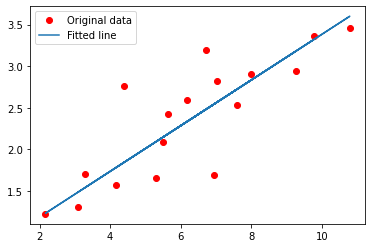

In [8]:
# Graphic display
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()